<a href="https://colab.research.google.com/github/allanstar-byte/ESTRELLA/blob/master/PYTHON_WORLD_SUICIDE_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PYTHON DATA CLEANING, OUTLIERS AND ANALYTICS**

# **1. Importing Libraries**

In [1]:
# Importing the pandas library
import pandas as pd

# Importing the numpy library
import numpy as np

# **2. Reading the Dataset from our CSV file**

The dataset we will use contains suicide cases from different countries in the world with different generations, age groups and other factors as outlined below.

In [2]:
#Reading the data from the CSV file and create the dataframe to be used
df = pd.read_csv('/content/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.shape

(27820, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# **3. Data Understanding**

We might need to convert columns to the respective datatypes ie. columns we could convert them from string to float. This observation can be made by accessing information about the dataset.

In [5]:
#Getting the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


# **4. Data Cleaning**

Let us perform data cleaning procedures below providing a documentation for our actions. We will perform as many data cleaning procedures as we think suitable for the various dimensions of data.

**4.1 Validity**

In [6]:
#dropping the country-year column since we have years and country column
df.drop('country-year', axis=1, inplace=True)

**4.2 Accuracy**

In [7]:
#Checking if there is any missing data without a country 
df.country.isna().sum()

0

**4.3 Completeness**

In [8]:
#identifying the the presence of the missing values
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
#dropping the HDI for year since it has most missing values
df.drop('HDI for year', axis=1, inplace=True)


In [10]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


**4.4 Consistency**

In [11]:
#checking for duplicates
df.duplicated().sum()

0

**4.5 Uniformity**

In [12]:
#Renaming column 'gdp_for_year ($): Gdp_for
#to resolve syntax errors

df.columns.values[7] = 'Gdp'

#creating variable df1 for the renamed dataset
df1 = df.rename(columns= {'country': 'Country', 'year': 'Year', 'sex': 'Sex', 'age': 'Age', 
                          'suicides_no': 'Suicides_no', 'population': 'Population', 'suicides/100k pop': 'Suicides_per_hundred_thousand_pop', 
                          'Gdp': 'Gdp_for_year', 'gdp_per_capita ($)': 'Gdp_per_capita', 'generation': 'Generation'})
df1.head(2)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent


In [13]:
#Changing the datatype of the column Gdp_for_year and removing the commas
df1['Gdp_for_year']=df1['Gdp_for_year'].str.replace(',','').astype('float')
df1.head(3)

,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X


# **5. Outliers**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


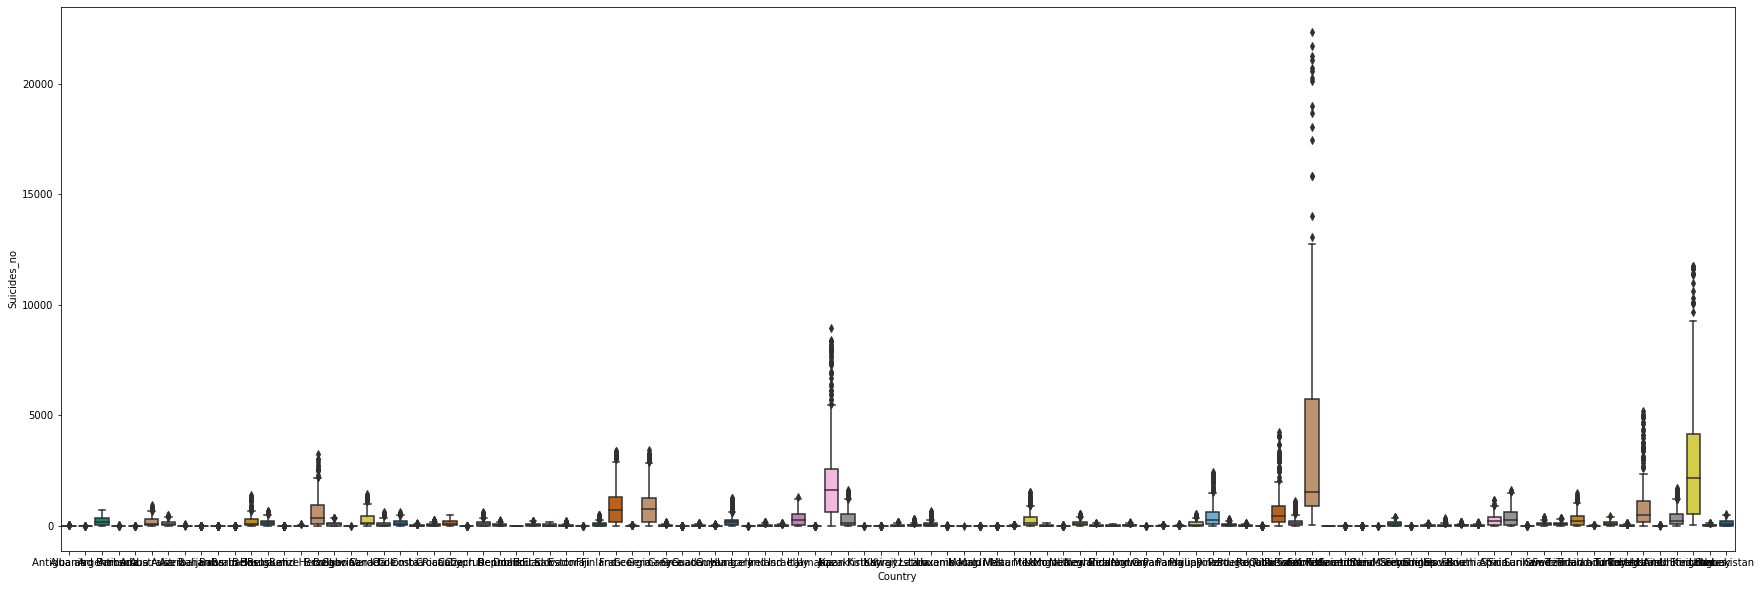

In [14]:
#Checking for outliers in the Suicides column based on the Countries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.boxplot(y='Suicides_no', x='Country', 
                 data=df1, 
                 palette="colorblind",
                 )

In [15]:
#Removing outliers from the Suicides_no columns that is, the extreme cases
df1.Suicides_no.astype = float
Q1 = df1['Suicides_no'].quantile(0.25)
Q3 = df1['Suicides_no'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df1['Suicides_no'] >= Q1 - 1.5 * IQR) & (df1['Suicides_no'] <= Q3 + 1.5 *IQR)

# creating variable dfz for the removed outliers from the suicide column
dfz = df1.loc[filter]
dfz.shape


(23911, 10)

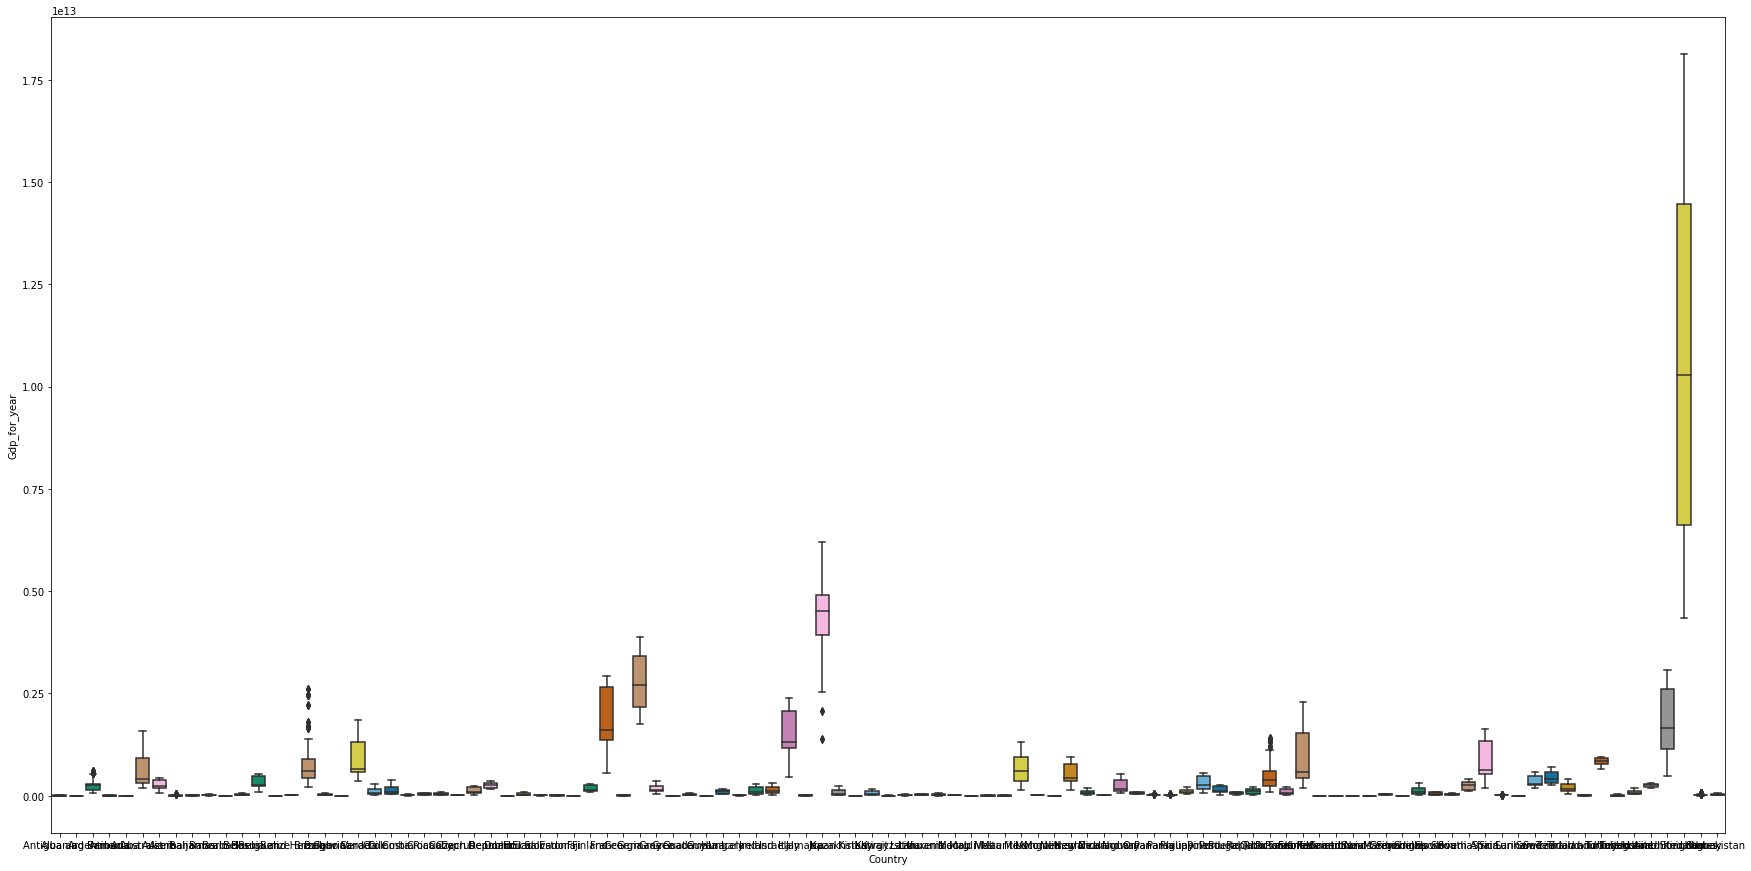

In [16]:
#Checking for outliears in the Gdp_for_year colunn based on the Countries if any
plt.figure(figsize=(30,15))
sns.boxplot(y='Gdp_for_year', x='Country', 
                 data=dfz, 
                 palette="colorblind",
                 )

In [17]:
#Removing outliers from the Gdp_for_year columns that is, the extreme cases
Q1 = dfz['Gdp_for_year'].quantile(0.25)
Q3 = dfz['Gdp_for_year'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfz['Gdp_for_year'] >= Q1 - 1.5 * IQR) & (dfz['Gdp_for_year'] <= Q3 + 1.5 *IQR)

# creating variable dfq for the removed outliers from the suicide column
dfq = dfz.loc[filter]
dfq.shape

(21306, 10)

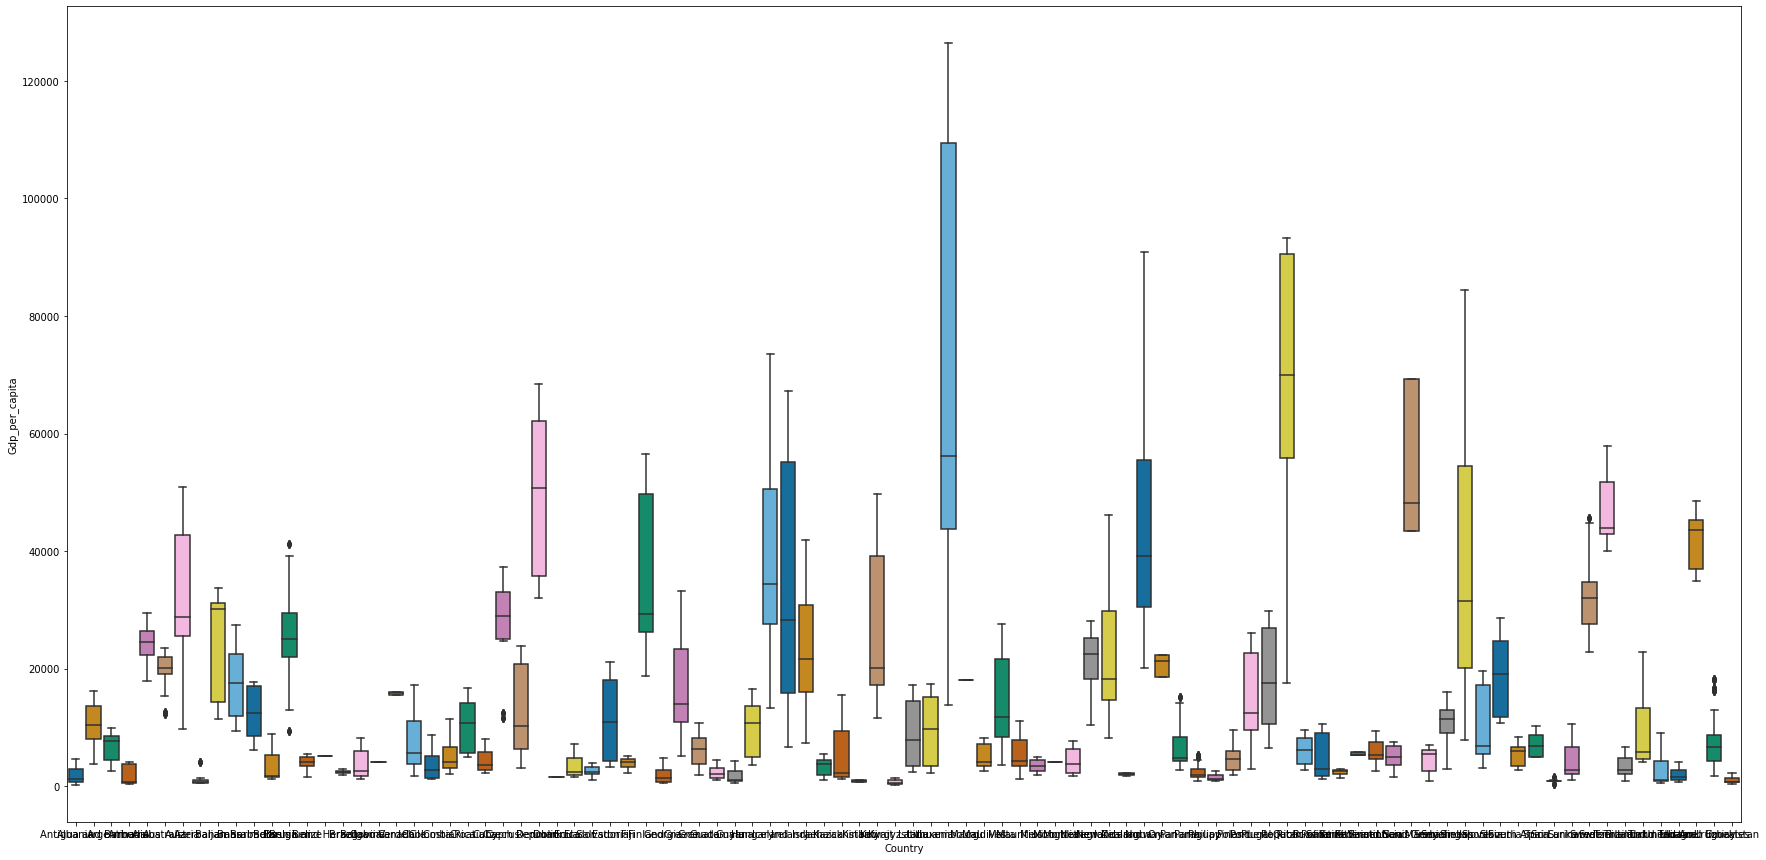

In [18]:
#Checking for outliers in the Gdp_per_capita colunn based on the Countries if there is any
plt.figure(figsize=(30,15))
sns.boxplot(y='Gdp_per_capita', x='Country', 
                 data=dfq, 
                 palette="colorblind",
                 )

In [19]:
#Removing outliers from the Gdp_per_capita columns that is, the extreme cases
Q1 = dfq['Gdp_per_capita'].quantile(0.25)
Q3 = dfq['Gdp_per_capita'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dfq['Gdp_per_capita'] >= Q1 - 1.5 * IQR) & (dfq['Gdp_per_capita'] <= Q3 + 1.5 *IQR)

# creating variable df2 for the removed outliers from the suicide column
df2 = dfq.loc[filter]
df2.shape

(19808, 10)

In [20]:
#The original data shape before dropping the outliers
df1.shape

(27820, 10)

In [21]:
#Creating a new column to calculate the rate of suicides per generation 
df2['Suicide_rate'] = (df2['Suicides_no']/df2['Population']*100)
df2.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Year,Sex,Age,Suicides_no,Population,Suicides_per_hundred_thousand_pop,Gdp_for_year,Gdp_per_capita,Generation,Suicide_rate
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X,0.006711
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent,0.005195


## **6. Exporting cleaned dataset to CSV**

In [22]:
df2.to_csv('Suicide.csv')

# **7. Analytics**

In [23]:
#1. identifying top 5 countries with the highest suicide cases in the world overall
df3 = df2.groupby(['Country'])['Suicides_no'].sum().sort_values(ascending = False)
df3.head()


Country
Bulgaria    31114
Hungary     30122
Chile       30111
Colombia    28094
Romania     27161
Name: Suicides_no, dtype: int64

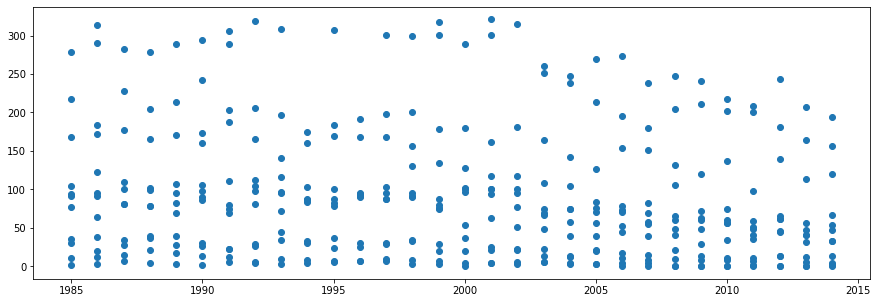

In [24]:
#plotting the scatter plot of the country with the most suicide cases 
df4b = df2.loc[df2['Country'] == 'Bulgaria']
plt.figure(figsize=(15,5))
plt.scatter(df4b.Year, df4b.Suicides_no)

In [25]:
#2. identifying top 5 countries with the lowest suicide cases in the world on overall
dfw = df2.groupby(['Country'])['Suicides_no'].sum()
dfd = dfw.sort_values(ascending = True)
dfd.head(10)

Country
Dominica                  0
Saint Kitts and Nevis     0
San Marino                1
Antigua and Barbuda      11
Maldives                 20
Qatar                    23
Macau                    27
Oman                     33
Grenada                  38
Cabo Verde               42
Name: Suicides_no, dtype: int64

In [26]:
#3(a). identifying the generation with the highest suicide cases on Overall 
df4 = df2.groupby(['Generation'])['Suicide_rate'].sum()
df4 = df4.sort_values(ascending = False)
df4.head()

Generation
Silent             68.981965
G.I. Generation    48.559870
Generation X       41.461185
Boomers            36.591157
Millenials         18.740245
Name: Suicide_rate, dtype: float64

In [27]:
#3(b). identifying the generation with the highest suicide cases before 2000
dfzx = df2.loc[df2['Year'] < 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum().sort_values(ascending = False)
dfgh

Generation
G.I. Generation    45.037588
Generation X       21.152026
Boomers            19.620954
Silent             17.476758
Millenials          0.738956
Name: Suicide_rate, dtype: float64

In [28]:
#3(c). identifying the generation with the highest suicide cases after 2000
dfzx2 = df2.loc[df2['Year'] >= 2000]
dfgh = dfzx2.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = False)
dfgh.head()

Generation
Silent             51.505206
Generation X       20.309159
Millenials         18.001289
Boomers            16.970203
G.I. Generation     3.522282
Name: Suicide_rate, dtype: float64

<BarContainer object of 3025 artists>

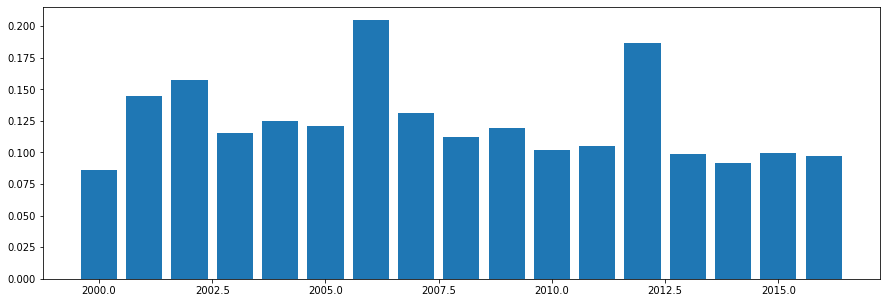

In [29]:
#plotting the bar graph of the generation with the most suicide cases after 2000
dfy = dfzx2.loc[df2['Generation'] == 'Silent']
plt.figure(figsize=(15,5))
plt.bar(dfy.Year, dfy.Suicide_rate)

In [30]:
#4(a). identifying the generations with the lowest suicide cases on overall
dfr = df2.groupby(['Generation'])['Suicide_rate'].sum()
dfr = df4.sort_values(ascending = True)
dfr.head()

Generation
Generation Z        0.694169
Millenials         18.740245
Boomers            36.591157
Generation X       41.461185
G.I. Generation    48.559870
Name: Suicide_rate, dtype: float64

In [31]:
#4(b). identifying the generation with the lowest suicide cases before 2000
dfzx = df2.loc[df2['Year'] < 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = True)
dfgh.head()

Generation
Millenials          0.738956
Silent             17.476758
Boomers            19.620954
Generation X       21.152026
G.I. Generation    45.037588
Name: Suicide_rate, dtype: float64

In [32]:
#4(c). identifying the generation with the lowest suicide cases after 2000
dfzx = df2.loc[df2['Year'] >= 2000]
dfgh = dfzx.groupby(['Generation'])['Suicide_rate'].sum()
dfgh = dfgh.sort_values(ascending = True)
dfgh.head()

Generation
Generation Z        0.694169
G.I. Generation     3.522282
Boomers            16.970203
Millenials         18.001289
Generation X       20.309159
Name: Suicide_rate, dtype: float64

In [33]:
#5(a) Investigating which gender has more suicide rates compared to the other one on overall
df5 = df2.groupby(['Sex'])['Suicides_no'].sum()
df5 = df5.sort_values(ascending = False)
df5.head()

Sex
male      498619
female    329940
Name: Suicides_no, dtype: int64

<BarContainer object of 10452 artists>

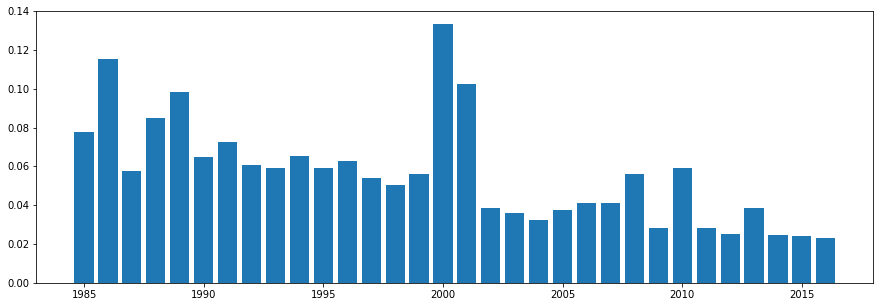

In [34]:
#plotting for the female suicide cases scross different years on overall
dfg = df2.loc[df2['Sex'] == 'female']
plt.figure(figsize=(15,5))
plt.bar(dfg.Year, dfg.Suicide_rate)

<BarContainer object of 9356 artists>

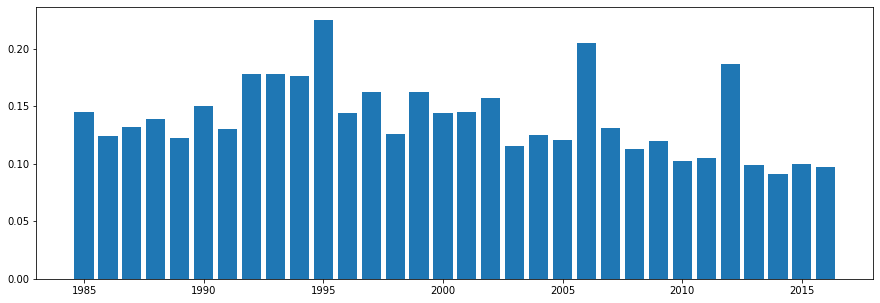

In [35]:
#plotting for the male suicide cases scross different years on overall
dfp = df2.loc[df2['Sex'] == 'male']
plt.figure(figsize=(15,5))
plt.bar(dfp.Year, dfp.Suicide_rate)

In [36]:
#6(a). Knowing the age group which most people commit suicide on overall
df6 = df2.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()

Age
75+ years      77.855515
55-74 years    40.175535
25-34 years    35.094635
35-54 years    32.224815
15-24 years    27.357974
Name: Suicide_rate, dtype: float64

In [37]:
#6(b). Knowing the age group which most people commit suicide before 2000
dfzx = df2.loc[df2['Year'] < 2000]
df6 = dfzx.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()


Age
75+ years      38.995888
55-74 years    18.919981
25-34 years    16.844746
35-54 years    14.903013
15-24 years    13.345601
Name: Suicide_rate, dtype: float64

In [38]:
#6(c). Knowing the age group which most people commit suicide after 2000
dfzx = df2.loc[df2['Year'] >= 2000]
df6 = dfzx.groupby(['Age'])['Suicide_rate'].sum()
df6 = df6.sort_values(ascending = False)
df6.head()

Age
75+ years      38.859627
55-74 years    21.255554
25-34 years    18.249889
35-54 years    17.321802
15-24 years    14.012373
Name: Suicide_rate, dtype: float64

In [39]:
#7. Finding out the year where people committed suicide the most on overall
df7 = df2.groupby(['Year'])['Suicides_no'].sum()
df7 = df7.sort_values(ascending = False)
df7.head()

Year
1999    35636
2000    35279
2002    35128
2001    34769
1997    34544
Name: Suicides_no, dtype: int64

In [40]:
#8. Finding which countries has the most suicides commited at every 100,000 on overall.
df8 = df2.groupby(['Country'])['Suicides_per_hundred_thousand_pop'].sum()
df8 = df8.sort_values(ascending = False)
df8.head()

Country
Lithuania    8091.18
Latvia       7264.59
Suriname     7162.32
Slovenia     7012.62
Estonia      6873.78
Name: Suicides_per_hundred_thousand_pop, dtype: float64

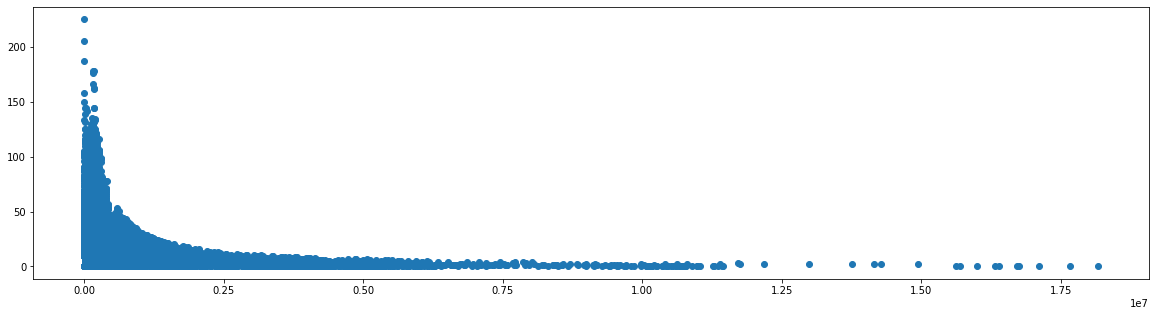

In [41]:
#Plotting for the population against Suicides_per_hundred_thousand_pop
plt.figure(figsize=(20,5))

plt.scatter(df2.Population, df2.Suicides_per_hundred_thousand_pop)


In [42]:
#9. Finding which countries has the least suicides commited at every 100,000 on overall
dfi = df2.groupby(['Country'])['Suicides_per_hundred_thousand_pop'].sum()
dfi = dfi.sort_values(ascending = True)
dfi.head(7)

Country
Dominica                  0.00
Saint Kitts and Nevis     0.00
Russian Federation       10.52
Oman                     26.50
Qatar                    27.30
San Marino               47.26
United Arab Emirates     50.49
Name: Suicides_per_hundred_thousand_pop, dtype: float64

In [43]:
#10. Finding which Age groups has the most suicides commited at every 100,000 on overall
df9 = df2.groupby(['Age'])['Suicides_per_hundred_thousand_pop'].sum()
df9 = df9.sort_values(ascending = False)
df9.head()

Age
75+ years      77855.35
55-74 years    40175.26
25-34 years    35094.57
35-54 years    32224.65
15-24 years    27357.85
Name: Suicides_per_hundred_thousand_pop, dtype: float64

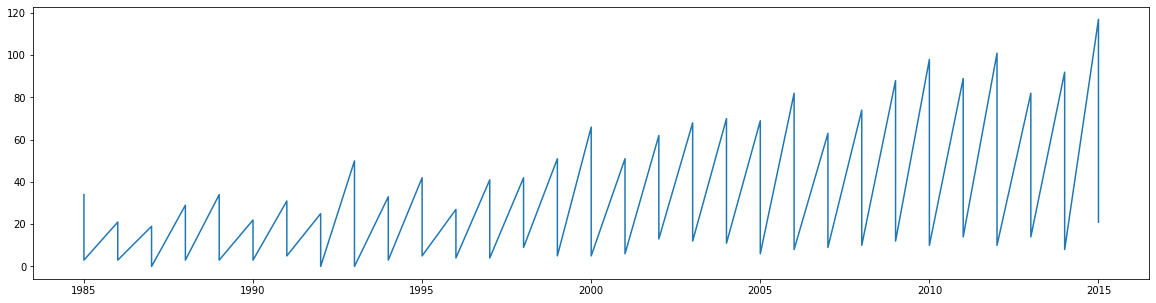

In [44]:
#plotting the 75+ years suicide rate for exapmle a country otside africa
dfx = df2.loc[df2['Age'] == '75+ years']

dfb = dfx.loc[dfx['Country'] == 'Chile']
plt.figure(figsize=(20,5))
plt.plot(dfb.Year, dfb.Suicides_no)

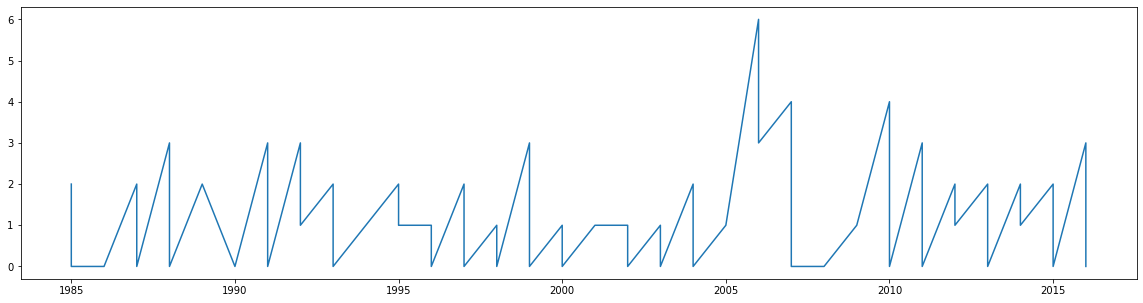

In [45]:
#plotting the suicide rate with an african country (Mauritius)
dfb = dfx.loc[dfx['Country'] == 'Mauritius']
plt.figure(figsize=(20,5))
plt.plot(dfb.Year, dfb.Suicides_no)

In [46]:
#11. does the GDP affect a countries suicide rates? if so how? no overall
df15 = df2.groupby(['Country', 'Suicides_no'])['Gdp_for_year'].sum()
df16 = df15.sort_values(ascending=False)
df16.head(10)
#countries with high gdp have the lowest suicide cases

Country               Suicides_no
Greece                0              7.745288e+12
Kuwait                0              4.832061e+12
South Africa          4              3.632857e+12
                      8              3.519811e+12
Portugal              0              2.988242e+12
South Africa          2              2.984354e+12
Slovakia              0              2.891629e+12
United Arab Emirates  0              2.786637e+12
Australia             4              2.597880e+12
Sweden                3              2.592805e+12
Name: Gdp_for_year, dtype: float64

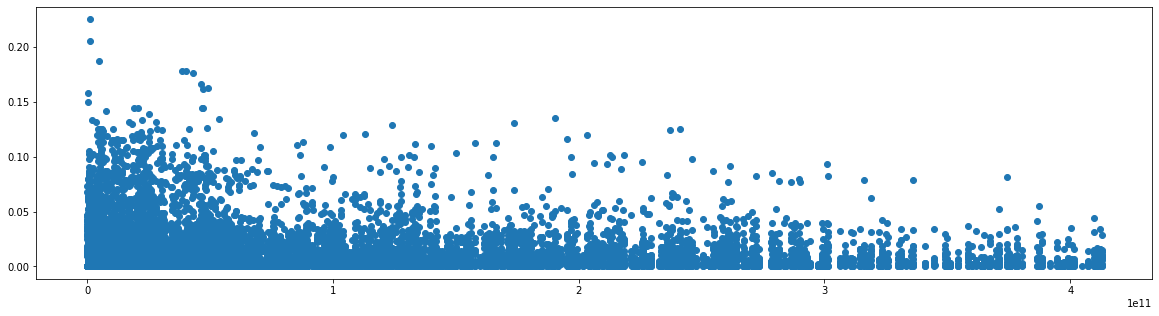

In [47]:
#plotting Gdp_for_year against suicide rate
plt.figure(figsize=(20,5))
plt.scatter(df2.Gdp_for_year, df2.Suicide_rate)

In [48]:
#12 how does population impact the suicide rates? on overall
df17 = df2.groupby(['Country'])['Suicide_rate', 'Gdp_per_capita'].sum()
df18 = df17.sort_values(by = 'Gdp_per_capita', ascending=False)
df18.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Suicide_rate,Gdp_per_capita
Country,,
Israel,3.329913,8602668
New Zealand,4.863756,7198884
Bahamas,0.344269,7130844
Puerto Rico,3.789284,6827184
Singapore,5.108645,6530112


<BarContainer object of 19808 artists>

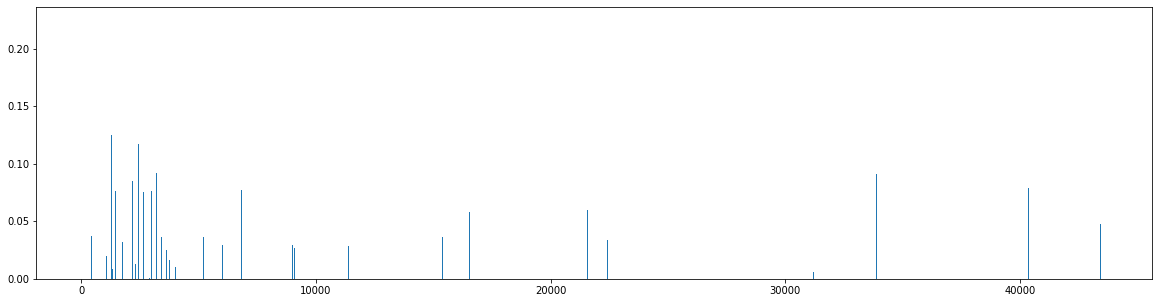

In [49]:
#plotting Gdp_per_capita against suicide_rate
plt.figure(figsize=(20,5))
plt.bar(df2.Gdp_per_capita, df2.Suicide_rate)